In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torchvision import transforms, datasets



In [9]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

print('Using Pytorch version:', torch.__version__, 'Device:', DEVICE)

Using Pytorch version: 1.9.0+cu102 Device: cuda


In [10]:
BATCH_SIZE = 32
EPOCHS = 10

In [11]:
train_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",
                                      train = True,
                                      download = True,
                                      transform = transforms.ToTensor())

test_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",
                                     train = False,
                                     transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

In [12]:
for (X_train, y_train) in train_loader:
  print("X_train:", X_train.size(), "type:", X_train.type())
  print("Y_train:", y_train.size(), "type:", y_train.type())
  break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
Y_train: torch.Size([32]) type: torch.LongTensor


In [14]:
class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,32),)
    self.decoder = nn.Sequential(
        nn.Linear(32, 256),
        nn.ReLU(),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.Linear(512, 28*28),)
    

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [15]:
model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [16]:
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx,(image, _) in enumerate(train_loader):
    image = image.view(-1, 28*28).to(DEVICE)
    target = image.view(-1, 28*28).to(DEVICE)
    optimizer.zero_grad()
    encoded, decoded = model(image)
    loss = criterion(decoded, target)
    loss.backward()
    optimizer.step()

    if batch_idx%log_interval == 0:
      print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
          Epoch, batch_idx * len(image),
          len(train_loader.dataset), 100.*batch_idx / len(train_loader),
          loss.item()))
      

In [17]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  real_image = []
  gen_image = []
  with torch.no_grad():
    for image, _ in test_loader:
      image = image.view(-1, 28*28).to(DEVICE)
      target = image.view(-1, 28*28).to(DEVICE)
      encoded, decoded = model(image)

      test_loss += criterion(decoded, image).item()
      real_image.append(image.to("cpu"))
      gen_image.append(decoded.to("cpu"))

  test_loss /= len(test_loader.dataset)
  return test_loss, real_image, gen_image

Train Epoch: 1 [0/60000(0%)]	Train Loss: 0.010217
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.012530
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.011531
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.011090
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.010233
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.009123
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.009567
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.009284
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.011190
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.011673

[EPOCH : 1], 	Test Loss: 0.0003


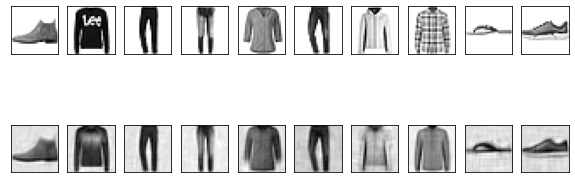

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.011269
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.013791
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.008624
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.013693
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.010009
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.010904
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.009419
Train Epoch: 2 [44800/60000(75%)]	Train Loss: 0.010137
Train Epoch: 2 [51200/60000(85%)]	Train Loss: 0.011449
Train Epoch: 2 [57600/60000(96%)]	Train Loss: 0.009928

[EPOCH : 2], 	Test Loss: 0.0003


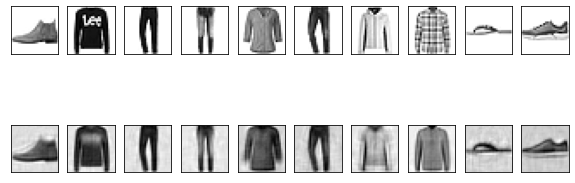

Train Epoch: 3 [0/60000(0%)]	Train Loss: 0.010602
Train Epoch: 3 [6400/60000(11%)]	Train Loss: 0.011187
Train Epoch: 3 [12800/60000(21%)]	Train Loss: 0.009963
Train Epoch: 3 [19200/60000(32%)]	Train Loss: 0.014422
Train Epoch: 3 [25600/60000(43%)]	Train Loss: 0.013202
Train Epoch: 3 [32000/60000(53%)]	Train Loss: 0.010010
Train Epoch: 3 [38400/60000(64%)]	Train Loss: 0.008285
Train Epoch: 3 [44800/60000(75%)]	Train Loss: 0.011132
Train Epoch: 3 [51200/60000(85%)]	Train Loss: 0.010502
Train Epoch: 3 [57600/60000(96%)]	Train Loss: 0.012897

[EPOCH : 3], 	Test Loss: 0.0003


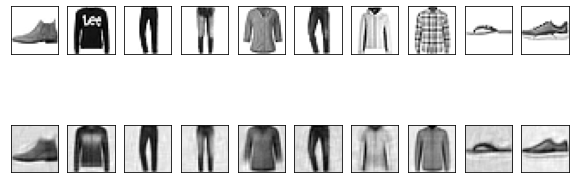

Train Epoch: 4 [0/60000(0%)]	Train Loss: 0.008208
Train Epoch: 4 [6400/60000(11%)]	Train Loss: 0.009264
Train Epoch: 4 [12800/60000(21%)]	Train Loss: 0.011089
Train Epoch: 4 [19200/60000(32%)]	Train Loss: 0.010405
Train Epoch: 4 [25600/60000(43%)]	Train Loss: 0.008889
Train Epoch: 4 [32000/60000(53%)]	Train Loss: 0.010745
Train Epoch: 4 [38400/60000(64%)]	Train Loss: 0.009867
Train Epoch: 4 [44800/60000(75%)]	Train Loss: 0.010865
Train Epoch: 4 [51200/60000(85%)]	Train Loss: 0.011548
Train Epoch: 4 [57600/60000(96%)]	Train Loss: 0.009558

[EPOCH : 4], 	Test Loss: 0.0003


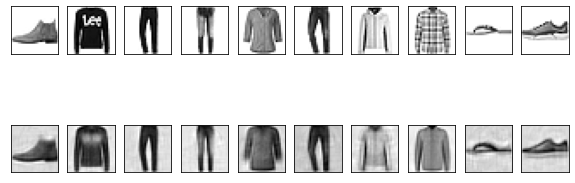

Train Epoch: 5 [0/60000(0%)]	Train Loss: 0.012406
Train Epoch: 5 [6400/60000(11%)]	Train Loss: 0.008302
Train Epoch: 5 [12800/60000(21%)]	Train Loss: 0.009139
Train Epoch: 5 [19200/60000(32%)]	Train Loss: 0.011601
Train Epoch: 5 [25600/60000(43%)]	Train Loss: 0.010464
Train Epoch: 5 [32000/60000(53%)]	Train Loss: 0.009796
Train Epoch: 5 [38400/60000(64%)]	Train Loss: 0.011535
Train Epoch: 5 [44800/60000(75%)]	Train Loss: 0.012270
Train Epoch: 5 [51200/60000(85%)]	Train Loss: 0.011654
Train Epoch: 5 [57600/60000(96%)]	Train Loss: 0.008534

[EPOCH : 5], 	Test Loss: 0.0003


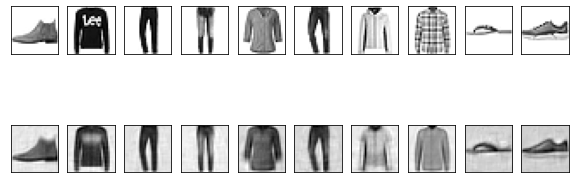

Train Epoch: 6 [0/60000(0%)]	Train Loss: 0.011300
Train Epoch: 6 [6400/60000(11%)]	Train Loss: 0.010166
Train Epoch: 6 [12800/60000(21%)]	Train Loss: 0.008849
Train Epoch: 6 [19200/60000(32%)]	Train Loss: 0.009172
Train Epoch: 6 [25600/60000(43%)]	Train Loss: 0.008397
Train Epoch: 6 [32000/60000(53%)]	Train Loss: 0.008870
Train Epoch: 6 [38400/60000(64%)]	Train Loss: 0.007758
Train Epoch: 6 [44800/60000(75%)]	Train Loss: 0.011502
Train Epoch: 6 [51200/60000(85%)]	Train Loss: 0.010376
Train Epoch: 6 [57600/60000(96%)]	Train Loss: 0.009992

[EPOCH : 6], 	Test Loss: 0.0003


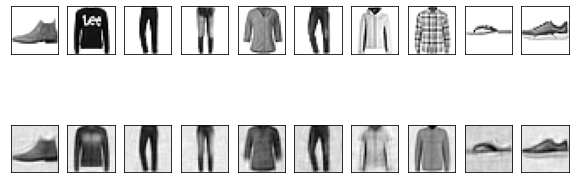

Train Epoch: 7 [0/60000(0%)]	Train Loss: 0.009659
Train Epoch: 7 [6400/60000(11%)]	Train Loss: 0.008073
Train Epoch: 7 [12800/60000(21%)]	Train Loss: 0.010250
Train Epoch: 7 [19200/60000(32%)]	Train Loss: 0.007806
Train Epoch: 7 [25600/60000(43%)]	Train Loss: 0.009056
Train Epoch: 7 [32000/60000(53%)]	Train Loss: 0.009319
Train Epoch: 7 [38400/60000(64%)]	Train Loss: 0.010732
Train Epoch: 7 [44800/60000(75%)]	Train Loss: 0.011782
Train Epoch: 7 [51200/60000(85%)]	Train Loss: 0.009004
Train Epoch: 7 [57600/60000(96%)]	Train Loss: 0.011369

[EPOCH : 7], 	Test Loss: 0.0003


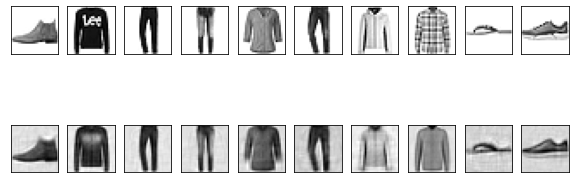

Train Epoch: 8 [0/60000(0%)]	Train Loss: 0.009770
Train Epoch: 8 [6400/60000(11%)]	Train Loss: 0.008622
Train Epoch: 8 [12800/60000(21%)]	Train Loss: 0.011163
Train Epoch: 8 [19200/60000(32%)]	Train Loss: 0.009638
Train Epoch: 8 [25600/60000(43%)]	Train Loss: 0.008789
Train Epoch: 8 [32000/60000(53%)]	Train Loss: 0.008613
Train Epoch: 8 [38400/60000(64%)]	Train Loss: 0.010071
Train Epoch: 8 [44800/60000(75%)]	Train Loss: 0.009221
Train Epoch: 8 [51200/60000(85%)]	Train Loss: 0.008377
Train Epoch: 8 [57600/60000(96%)]	Train Loss: 0.010531

[EPOCH : 8], 	Test Loss: 0.0003


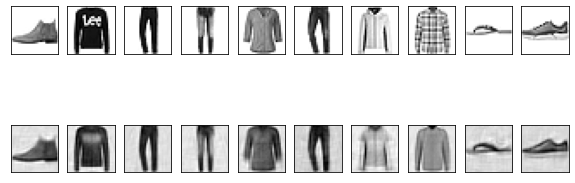

Train Epoch: 9 [0/60000(0%)]	Train Loss: 0.010254
Train Epoch: 9 [6400/60000(11%)]	Train Loss: 0.009236
Train Epoch: 9 [12800/60000(21%)]	Train Loss: 0.009847
Train Epoch: 9 [19200/60000(32%)]	Train Loss: 0.008960
Train Epoch: 9 [25600/60000(43%)]	Train Loss: 0.009496
Train Epoch: 9 [32000/60000(53%)]	Train Loss: 0.007427
Train Epoch: 9 [38400/60000(64%)]	Train Loss: 0.010815
Train Epoch: 9 [44800/60000(75%)]	Train Loss: 0.009772
Train Epoch: 9 [51200/60000(85%)]	Train Loss: 0.009217
Train Epoch: 9 [57600/60000(96%)]	Train Loss: 0.007997

[EPOCH : 9], 	Test Loss: 0.0003


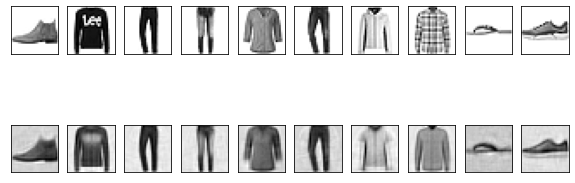

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.006975
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.011597
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.010565
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.009645
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.008233
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.008732
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.009379
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.012147
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.010820
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.009753

[EPOCH : 10], 	Test Loss: 0.0003


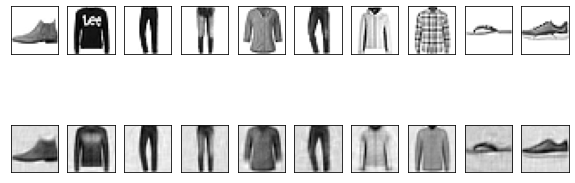

In [22]:
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval = 200)
  test_loss, real_image, gen_image = evaluate(model, test_loader)

  print("\n[EPOCH : {}], \tTest Loss: {:.4f}".format(Epoch, test_loss))

  f, a = plt.subplots(2, 10, figsize = (10,4))
  for i in range(10):
    img = np.reshape(real_image[0][i],(28,28))
    a[0][i].imshow(img, cmap = "gray_r")
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())

  for i in range(10):
    img = np.reshape(gen_image[0][i],(28,28))
    a[1][i].imshow(img, cmap = "gray_r")
    a[1][i].set_xticks(())
    a[1][i].set_yticks(())
  plt.show()